## Name: Aditi Rani

## Data Science and Business Analytics Task 2:
# Prediction using unsupervised ML

# Importing the required libraries

In [2]:
from sklearn.cluster import KMeans             
import pandas as pd                             
from sklearn.preprocessing import MinMaxScaler   
from matplotlib import pyplot as plt              
%matplotlib inline                               
import numpy as np                                

# Reading the csv file 
## Dropping the columns that are not required

In [5]:
x = pd.read_csv("Iris.csv")                      #reading the csv file

x.drop(['Id'], axis = 1, inplace = True)        #dropping the columns that are not required
x.drop(['Species'], axis = 1, inplace = True)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Finding the sum of square error to find the optimum number of clusters through elbow method

In [6]:
df = x.iloc[:, [0, 1, 2, 3]].values
k_rng = range(1,10)
sse = [] #sum of square errors            
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sse.append(km.inertia_)        #km.inertia_ gives the sum of square errors


In [7]:
sse

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.94595367106238,
 34.190687924796634,
 29.95408642103723,
 27.79236147186149]

Plotting the sum of square errors. The optimum number of clusters will be that where the elbow occurs.

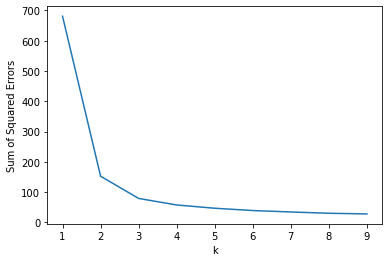

In [8]:
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng, sse)

Elbow occurs at 3, therefore, 3 are the required number of clusters.

## Predicting the clusters

In [10]:
km = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_predicted = km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Finding the cluster centers

In [11]:
centers = np.array(km.cluster_centers_)
centers

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

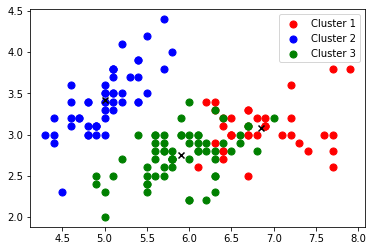

In [12]:
plt.scatter(df[y_predicted==0, 0], df[y_predicted==0, 1], s=50, c='red', label ='Cluster 1')
plt.scatter(df[y_predicted==1, 0], df[y_predicted==1, 1], s=50, c='blue', label ='Cluster 2')
plt.scatter(df[y_predicted==2, 0], df[y_predicted==2, 1], s=50, c='green', label ='Cluster 3')
plt.scatter(centers[:, 0], centers[:, 1], marker = "x", color = 'k')
plt.legend()


## THANKYOU